In [34]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
# import stistools
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from scipy.io.idl import readsav
from astropy.convolution import convolve_fft
from astropy.convolution import Gaussian1DKernel
from matplotlib.gridspec import GridSpec
from astropy.units import cds
cds.enable()

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


How to make the 1A version. Scipi or craftroom? How to make the instruments combine at the ends.

In [43]:
data = fits.getdata('/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj15a_broadband_v1_var-res-sed.fits',1)
# data= Table.read('test_to_fits/t1_table_test.ecsv')
data = Table(data, meta=fits.getheader('/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj15a_broadband_v1_var-res-sed.fits'))

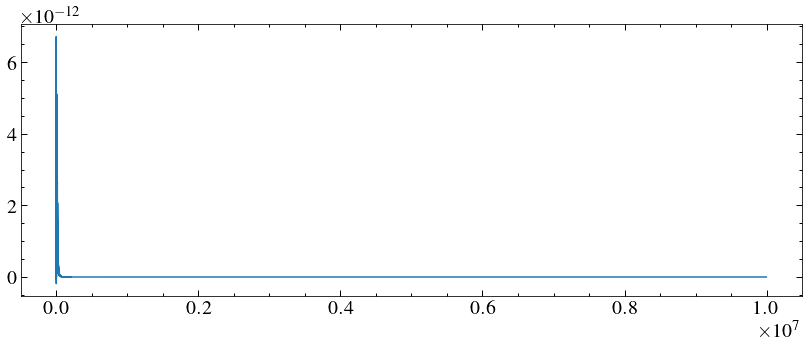

In [41]:
plt.plot(data['WAVELENGTH'],data['FLUX'])

In [4]:
#craftroom or scipy

In [5]:
w, f, e = data['WAVELENGTH'],data['FLUX'],data['ERROR']

In [6]:
from craftroom import resample

In [7]:
import math as mt

In [8]:
print(w[0],w[-1])

14.100000381469727 9995000.0


In [9]:
start, end= mt.ceil(w[0]), mt.floor(w[-1])
end = 1e5
print(start,end)

15 100000.0


In [10]:
neww = np.arange(start,end+1, 1)

In [11]:
f1 = interpolate.interp1d(w, f, fill_value='extrapolate',)(neww)
w2, f2 = resample.bintogrid(w, f, newx=neww)

[1.5000e+01 1.6000e+01 1.7000e+01 ... 9.9998e+04 9.9999e+04 1.0000e+05]


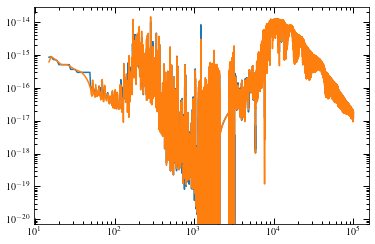

In [12]:
print(neww)
plt.plot(w2, f2)
plt.plot(neww, f1)
plt.xscale('log')
plt.yscale('log')

In [13]:
og = np.trapz(f,w)
sp = np.trapz(f1, neww)
cr =np.trapz(f2,w2)
print(og, sp,cr)
print(og/sp)
print(og/cr)

1.170614652905654e-10 1.164818747891401e-10 1.1649391379101026e-10
1.0049757999042725
1.004871941212082


In [14]:
data.dtype.names

('WAVELENGTH',
 'WAVELENGTH0',
 'WAVELENGTH1',
 'FLUX',
 'ERROR',
 'EXPTIME',
 'DQ',
 'EXPSTART',
 'EXPEND',
 'INSTRUMENT',
 'NORMFAC',
 'BOLOFLUX',
 'BOLOERR')

In [15]:
data['INSTRUMENT']

2048
2048
2048
2048
2048
2048
2048
2048
32768
32768
32768


In [16]:
i2 = interpolate.interp1d(w, data['INSTRUMENT'], kind = 'previous')(w2)

In [17]:
[print (wi, ii) for wi, ii in zip(w[100:200], data['INSTRUMENT'][100:200])]

79.51000213623047 32768
80.0199966430664 32768
80.52999877929688 32768
81.05000305175781 32768
81.58000183105469 32768
82.12000274658203 32768
82.66000366210938 32768
83.20999908447266 32768
83.7699966430664 32768
84.33000183105469 32768
84.9000015258789 32768
85.4800033569336 32768
86.06999969482422 32768
86.66000366210938 32768
87.2699966430664 32768
87.87999725341797 32768
88.5 32768
89.12999725341797 32768
89.7699966430664 32768
90.41999816894531 32768
91.08000183105469 32768
91.73999786376953 32768
92.41999816894531 32768
93.11000061035156 32768
93.80000305175781 32768
94.51000213623047 32768
95.2300033569336 32768
95.95999908447266 32768
96.69999694824219 32768
97.44999694824219 32768
98.22000122070312 32768
98.98999786376953 32768
99.77999877929688 32768
100.5999984741211 32768
101.4000015258789 32768
102.19999694824219 32768
103.0999984741211 32768
103.9000015258789 32768
104.80000305175781 32768
105.69999694824219 32768
106.5999984741211 32768
107.5 32768
108.4000015258789 327

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [18]:
[print (wi, ii) for wi, ii in zip(w2[:50], i2[:50])]

15.0 2048.0
16.0 2048.0
17.0 2048.0
18.0 2048.0
19.0 2048.0
20.0 2048.0
21.0 2048.0
22.0 2048.0
23.0 2048.0
24.0 2048.0
25.0 2048.0
26.0 2048.0
27.0 2048.0
28.0 2048.0
29.0 2048.0
30.0 2048.0
31.0 2048.0
32.0 2048.0
33.0 2048.0
34.0 2048.0
35.0 2048.0
36.0 2048.0
37.0 2048.0
38.0 2048.0
39.0 2048.0
40.0 2048.0
41.0 2048.0
42.0 2048.0
43.0 2048.0
44.0 2048.0
45.0 2048.0
46.0 2048.0
47.0 2048.0
48.0 2048.0
49.0 2048.0
50.0 2048.0
51.0 32768.0
52.0 32768.0
53.0 32768.0
54.0 32768.0
55.0 32768.0
56.0 32768.0
57.0 32768.0
58.0 32768.0
59.0 32768.0
60.0 32768.0
61.0 32768.0
62.0 32768.0
63.0 32768.0
64.0 32768.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [19]:
for i in range(len(i2)-1):
    if i2[i] != i2[i+1]:
        i2[i] = i2[i] + i2[i+1]

In [20]:
[print (wi, ii) for wi, ii in zip(w2[100:200], i2[100:200])]

115.0 32768.0
116.0 32768.0
117.0 32768.0
118.0 32768.0
119.0 16809984.0
120.0 16777216.0
121.0 16777216.0
122.0 16777216.0
123.0 16777216.0
124.0 16777216.0
125.0 16777216.0
126.0 16777216.0
127.0 16777216.0
128.0 16777216.0
129.0 16777216.0
130.0 16777216.0
131.0 16777216.0
132.0 16777216.0
133.0 16777216.0
134.0 16777216.0
135.0 16777216.0
136.0 16777216.0
137.0 16777216.0
138.0 16777216.0
139.0 16777216.0
140.0 16777216.0
141.0 16777216.0
142.0 16777216.0
143.0 16777216.0
144.0 16777216.0
145.0 16777216.0
146.0 16777216.0
147.0 16777216.0
148.0 16777216.0
149.0 16777216.0
150.0 16777216.0
151.0 16777216.0
152.0 16777216.0
153.0 16777216.0
154.0 16777216.0
155.0 16777216.0
156.0 16777216.0
157.0 16777216.0
158.0 16777216.0
159.0 16777216.0
160.0 16777216.0
161.0 16777216.0
162.0 16777216.0
163.0 16777216.0
164.0 16777216.0
165.0 16777216.0
166.0 16777216.0
167.0 16777216.0
168.0 16777216.0
169.0 16777216.0
170.0 16777216.0
171.0 16777216.0
172.0 16777216.0
173.0 16777216.0
174.0 167

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [21]:
a = [200, 200, 200, 150]
b = [1, 2, 3,4]
c = [1.2, 2.4, 3.6]
d = interpolate.interp1d(b, a, fill_value='extrapolate')(c)
print(d)

[200. 200. 170.]


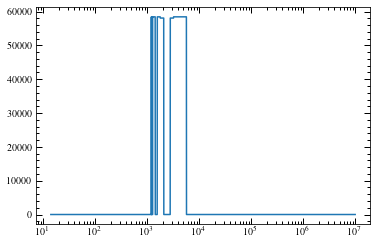

In [22]:
plt.plot(data['WAVELENGTH'], data['EXPSTART'])
plt.xscale('log')

In [23]:
x1 = np.arange(1, 11, 0.1)
x2 = np.arange(1, 11, 1)
y1 = np.hstack((np.full(10, 30), np.full(60, 25), np.full(30, 15)))
up = interpolate.interp1d(x1, y1, kind='next')(x2)
down = interpolate.interp1d(x1, y1, kind='previous')(x2)
print(up)
print(down)
print(np.min([up, down], axis=0))
print(np.max([up, down], axis=0))
print(interpolate.interp1d(x1, y1)(x2))

[30. 25. 25. 25. 25. 25. 25. 15. 15. 15.]
[30. 30. 25. 25. 25. 25. 25. 25. 15. 15.]
[30. 25. 25. 25. 25. 25. 25. 15. 15. 15.]
[30. 30. 25. 25. 25. 25. 25. 25. 15. 15.]
[30. 25. 25. 25. 25. 25. 25. 15. 15. 15.]


In [24]:
# data['FLUX']

In [51]:
def sed_to_const_res(sed_table, res=1, start_cut=0, end_cut = 1e5):
    """
    Rebins an SED to a wavelength grid with a bin size of res, default = 1A
    """
    
    #wavelength 
    start, end= mt.ceil(sed_table['WAVELENGTH'][0]), mt.floor(sed_table['WAVELENGTH'][-1])
    if start < start_cut: #cut MM SEDs down to 1e5 A
        start = start_cut
    if end > end_cut:
        end = end_cut 
    
    new_wavelength = np.arange(start,end+res, res)
    new_w0 = new_wavelength - (0.5 * res)
    new_w1 = new_wavelength + (0.5 * res)

    #flux
    new_wavelength, new_flux = resample.bintogrid(sed_table['WAVELENGTH'], sed_table['FLUX'], newx=new_wavelength)
    
    #error
    new_error =  interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['ERROR'])(new_wavelength)
    
    #exptime - linear extrapolation is similar to averaged to bin widths
    new_exptime = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPTIME'])(new_wavelength)
    
    #dq - interploate, then look for unusual values and correct them, summing if the values to either side are different.
   
    new_dq = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['DQ'], kind='previous')(new_wavelength)
    new_dq = new_dq.astype(int)
    
    #expstart - minumum expstart in each bin
    startups = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPSTART'], kind='next')(new_wavelength)
    startdowns = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPSTART'], kind='previous')(new_wavelength)
    new_expstart = np.min([startups, startdowns], axis=0)
    
    #expends - maximum expend in each bin
    endups = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPEND'], kind='next')(new_wavelength)
    enddowns = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPEND'], kind='previous')(new_wavelength)
    new_expend = np.max([endups, enddowns], axis=0)
    
    #instrument - as dqs
    new_instrument = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['INSTRUMENT'], kind='previous')(new_wavelength)
    new_instrument = new_instrument.astype(int)
    
    #dq and instrument loop
    for i in range(len(new_wavelength))[1:-1]:
        if new_dq[i] != new_dq[i+1]:
            new_dq[i] = new_dq[i] + new_dq[i+1]
        if new_instrument[i] != new_instrument[i+1]:
            new_instrument[i] = new_instrument[i] + new_instrument[i+1]
    
    #normfac - linear extrapolation
    new_normfac = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['NORMFAC'])(new_wavelength)
    
    #boloflux -use original boloflux for consitency
    bolo_int = sed_table.meta['BOLOFLUX']*(u.erg/u.s/u.cm**2)
    new_boloflux = (new_flux/bolo_int).value
    new_boloerr = (new_error/bolo_int).value
    

    names = sed_table.dtype.names
    new_sed_table = Table([new_wavelength*u.AA, new_w0*u.AA, new_w1*u.AA, new_flux*u.erg/u.s/u.cm**2/u.AA, new_error*u.erg/u.s/u.cm**2/u.AA, new_exptime*u.s, 
                           new_dq,new_expstart*cds.MJD, new_expend*cds.MJD, new_instrument, new_normfac, new_boloflux*(1/u.AA), new_boloerr*(1/u.AA)], names=names, meta= sed_table.meta)
    return new_sed_table
          
data1a = sed_to_const_res(data)

In [38]:
data1a

WAVELENGTH,WAVELENGTH0,WAVELENGTH1,FLUX,ERROR,EXPTIME,DQ,EXPSTART,EXPEND,INSTRUMENT,NORMFAC,BOLOFLUX,BOLOERR
Angstrom,Angstrom,Angstrom,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),s,,MJD,MJD,,,1 / Angstrom,1 / Angstrom
float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64
15.0,14.5,15.5,8.531023425328178e-16,9.669626883006534e-17,0.0,0,0.0,0.0,2048,1.0,7.2876444901426816e-06,8.260298860094535e-07
16.0,15.5,16.5,8.93218886301558e-16,1.7808785512825142e-16,0.0,0,0.0,0.0,2048,1.0,7.630340898983665e-06,1.5213192034305113e-06
17.0,16.5,17.5,7.257597991245535e-16,3.737463900878686e-16,0.0,0,0.0,0.0,2048,1.0,6.199818166662282e-06,3.1927363044719277e-06
18.0,17.5,18.5,7.257597991245541e-16,5.359092891551813e-16,0.0,0,0.0,0.0,2048,1.0,6.199818166662287e-06,4.5780162398016135e-06
19.0,18.5,19.5,6.71019570353574e-16,3.9661274294398645e-16,0.0,0,0.0,0.0,2048,1.0,5.732198624782249e-06,3.3880725989507286e-06
20.0,19.5,20.5,5.080094394838647e-16,2.573161967327915e-16,0.0,0,0.0,0.0,2048,1.0,4.339681194173535e-06,2.198128958099843e-06
21.0,20.5,21.5,5.080094394838652e-16,1.1801965052159656e-16,0.0,0,0.0,0.0,2048,1.0,4.33968119417354e-06,1.008185317248958e-06
22.0,21.5,22.5,5.079595286452045e-16,8.164223413611932e-17,0.0,0,0.0,0.0,2048,1.0,4.33925482979704e-06,6.974304817855316e-07


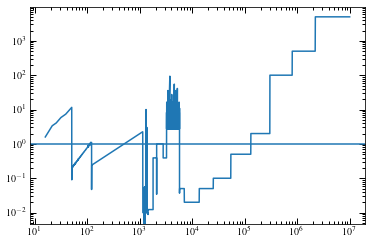

In [27]:
plt.plot(data['WAVELENGTH'][1:], np.diff(data['WAVELENGTH']))
plt.yscale('log')
plt.xscale('log')
plt.axhline(1)

(1e-19, 2.436952466244968e-11)

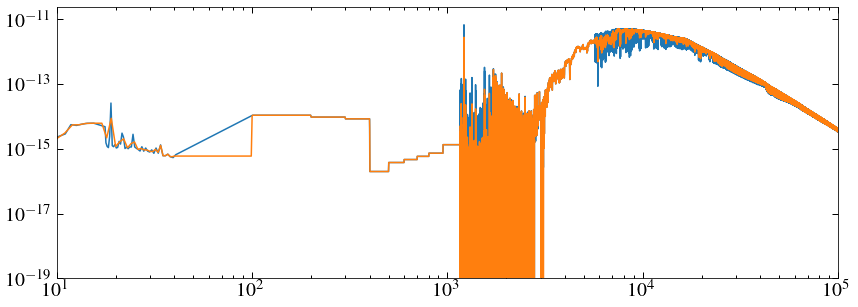

In [52]:
plt.plot(data['WAVELENGTH'], data['FLUX'])
plt.plot(data1a['WAVELENGTH'], data1a['FLUX'])
plt.yscale('log')
plt.xscale('log')
plt.xlim(10,1e5)
plt.ylim(1e-19)

In [53]:
print(np.unique(data['INSTRUMENT']))
print(np.unique(data1a['INSTRUMENT']))
print(np.unique(data['DQ']))
print(np.unique(data1a['DQ']))

INSTRUMENT
----------
        16
       256
      8192
     16384
     32768
     65536
    131072
    524288
INSTRUMENT
----------
        16
       256
      8192
     16384
     16400
     32768
     40960
     49152
     65536
     65552
    131072
    131328
    524288
    524304
    524544
   DQ  
-------
    0.0
   16.0
   32.0
   48.0
  256.0
  288.0
  500.0
  512.0
 1024.0
 1040.0
    ...
17424.0
18432.0
18448.0
18464.0
24576.0
24592.0
24608.0
26624.0
32784.0
40960.0
40992.0
Length = 34 rows
  DQ 
-----
    0
   16
   32
   48
   80
  256
  272
  288
  304
  500
  ...
36880
36896
40960
40976
40992
41008
45056
49168
49184
49200
57344
Length = 73 rows


(100.0, 120.0)

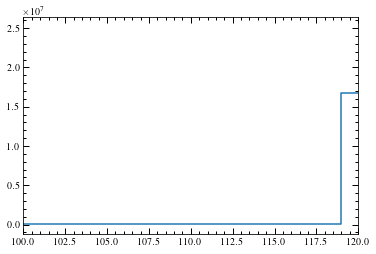

In [30]:
plt.step(data1a['WAVELENGTH'], data1a['INSTRUMENT'])
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(100, 120)
# plt.ylim(1000, 40000)

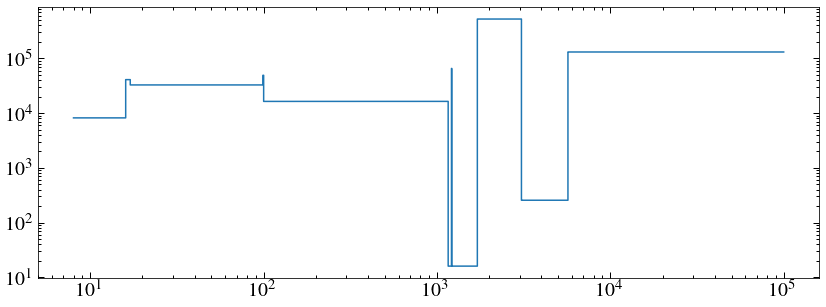

In [49]:
plt.step(data1a['WAVELENGTH'], data1a['INSTRUMENT'])
plt.xscale('log')
plt.yscale('log')